# Identical Binary Data Pre-Processing

## Libraries and Configurations

Import configuration files

In [89]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

Import **data libraries**

In [90]:
import pandas as pd

Import **other libraries**

In [91]:
from rich.progress import Progress
from rich import traceback

import os

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x775648b16a10>>

Custom helper scripts

In [92]:
%cd ..
from scripts import plotHelper, encodingHelper

%cd data_exploration_cleaning

/home/bacci/COMPACT/notebooks
/home/bacci/COMPACT/notebooks/data_exploration_cleaning


## Import Data

Importing every `CSV` file in the `binary` folder, merge them and create the labelled dataframe.

In [93]:
# Base directory containing the folders
base_dir = config["DEFAULT"]["binary_path"]

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".csv"):
            # Construct the full file path
            file_path = os.path.join(root, file)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path, dtype=str)

            # Store the DataFrame in the dictionary with a unique key (e.g., file name)
            dataframes[file] = df

In [94]:
bin_df = pd.concat(dataframes.values(), ignore_index=True)

In [95]:
bin_df = bin_df.astype(str)

In [96]:
bin_df.dtypes

mac                   object
e_id_ssid             object
len_ssid              object
ssid                  object
e_id_sup_rates        object
len_sup_rates         object
supported_rates       object
e_id_ext_sup_rates    object
len_ext_sup_rates     object
ext_sup_rates         object
e_id_dsss             object
len_dsss              object
dsss_parameter        object
e_id_ht_cap           object
len_ht_cap            object
ht_cap                object
e_id_ext_cap          object
len_ext_cap           object
ext_cap               object
e_id_vht_cap          object
len_vht_cap           object
vht_cap               object
e_id_vst              object
len_vst               object
vst                   object
e_id_ext_tags         object
len_ext_tags          object
ext_tags              object
frame_check_seq       object
label                 object
dtype: object

Export to CSV in `interim` folder

In [97]:
# bin_df.to_csv("../../data/interim/binary_df_raw.csv", index=False)

Set every column's type to string in order to avoid conversions and misrepresentation of the binary data.

In [98]:
bin_df = bin_df.astype(str)

Drop all the Element ID columns, since by definition they are always the same.

In [99]:
# Columns to drop
drop_starts_with = ["e_id_"]
bin_df = bin_df.drop(
    columns=[col for col in bin_df.columns if col.startswith(tuple(drop_starts_with))]
)

In [100]:
bin_df = bin_df.replace("nan", "0")

Zero padding columns to the maximum length

In [101]:
def zero_pad_column(df, exclude=[]):
    max_lengths = df.drop(columns=exclude).applymap(lambda x: len(str(x))).max()
    for col in df.columns:
        if col not in exclude:
            max_length = max_lengths[col]
            df[col] = df[col].fillna("").astype(str).str.ljust(max_length, "0")
    return df

In [102]:
df = zero_pad_column(bin_df, ["mac", "label"])

/tmp/ipykernel_16270/3590092166.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_lengths = df.drop(columns=exclude).applymap(lambda x: len(str(x))).max()


In [103]:
df

,mac,len_ssid,ssid,len_sup_rates,supported_rates,len_ext_sup_rates,ext_sup_rates,len_dsss,dsss_parameter,len_ht_cap,...,len_ext_cap,ext_cap,len_vht_cap,vht_cap,len_vst,vst,len_ext_tags,ext_tags,frame_check_seq,label
0,1a:e6:5a:fe:34:4c,00000000,0000000000000000000000000000000000000000000000...,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00000001,00011010,...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00101110110101000110100111001111,iPhone7_F
1,1a:e6:5a:fe:34:4c,00000000,0000000000000000000000000000000000000000000000...,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00000001,00011010,...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,11010111100011001000011011110001,iPhone7_F
2,1a:e6:5a:fe:34:4c,00000000,0000000000000000000000000000000000000000000000...,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00000001,00011010,...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,11010111100011001000011011110001,iPhone7_F
3,1a:e6:5a:fe:34:4c,00000000,0000000000000000000000000000000000000000000000...,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00000010,00011010,...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,11000100001011000110000000100001,iPhone7_F
4,1a:e6:5a:fe:34:4c,00000000,0000000000000000000000000000000000000000000000...,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00000010,00011010,...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,11000100001011000110000000100001,iPhone7_F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76699,da:a1:19:45:40:f0,00000000,0000000000000000000000000000000000000000000000...,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00001101,00011010,...,00000000,01111111,0000000000000000000010100000001000000001000000...,0000000000000000000000000000000000000000000000...,00000111,0000000001010000111100100000100000000000011000...,00000000,0000000000000000000000000000000000000000000000...,10110101111111110110100110111000,XiaomiRedmi4_B
76700,da:a1:19:45:40:f0,00000110,0011000100110001001100010011011101110011011110...,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00001101,00011010,...,00000000,01111111,0000000000000000000010100000001000000001000000...,0000000000000000000000000000000000000000000000...,00000111,0000000001010000111100100000100000000000011000...,00000000,0000000000000000000000000000000000000000000000...,11111010001100111100010011110000,XiaomiRedmi4_B
76701,da:a1:19:45:40:f0,00001001,0010000101101111011100000011000001110011011100...,00000100,0000001000000100000010110001011000000

In [104]:
len(df.iloc[76703][2])

/tmp/ipykernel_16270/2525256634.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  len(df.iloc[76703][2])


144

In [105]:
df = df.drop(columns=["frame_check_seq", "len_dsss", "ssid"])

In [106]:
df

,mac,len_ssid,len_sup_rates,supported_rates,len_ext_sup_rates,ext_sup_rates,dsss_parameter,len_ht_cap,ht_cap,len_ext_cap,ext_cap,len_vht_cap,vht_cap,len_vst,vst,len_ext_tags,ext_tags,label
0,1a:e6:5a:fe:34:4c,00000000,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00011010,0010110101000000000101111111111100000000000000...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,iPhone7_F
1,1a:e6:5a:fe:34:4c,00000000,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00011010,0010110101000000000101111111111100000000000000...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,iPhone7_F
2,1a:e6:5a:fe:34:4c,00000000,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00011010,0010110101000000000101111111111100000000000000...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,iPhone7_F
3,1a:e6:5a:fe:34:4c,00000000,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000010,00011010,0010110101000000000101111111111100000000000000...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,iPhone7_F
4,1a:e6:5a:fe:34:4c,00000000,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000010,00011010,0010110101000000000101111111111100000000000000...,00000000,01111111,0000000000000000000010001000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,iPhone7_F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76699,da:a1:19:45:40:f0,00000000,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001101,00011010,0110111000000001000000111111111100000000000000...,00000000,01111111,0000000000000000000010100000001000000001000000...,0000000000000000000000000000000000000000000000...,00000111,0000000001010000111100100000100000000000011000...,00000000,0000000000000000000000000000000000000000000000...,XiaomiRedmi4_B
76700,da:a1:19:45:40:f0,00000110,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001101,00011010,0110111000000001000000111111111100000000000000...,00000000,01111111,0000000000000000000010100000001000000001000000...,0000000000000000000000000000000000000000000000...,00000111,0000000001010000111100100000100000000000011000...,00000000,0000000000000000000000000000000000000000000000...,XiaomiRedmi4_B
76701,da:a1:19:45:40:f0,00001001,00000100,0000001000000100000010110001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001101,00011010,0110111000000001000000111111111100000000000000...,00000000,01111111,0000000000000000000010100000001000000001000000...,0000000000000000000000000000000000000000000000...,00000111,0000000001010000111100100000100000000000011000...,00000000,0000000000000000000000000000000000000000000000...,XiaomiRedmi4_B
76702,da:a1:19:45:40

In [107]:
df = df[df["label"].isin(["iPhone11_F", "iPhone11_C"])]

In [108]:
df.columns

Index(['mac', 'len_ssid', 'len_sup_rates', 'supported_rates',
       'len_ext_sup_rates', 'ext_sup_rates', 'dsss_parameter', 'len_ht_cap',
       'ht_cap', 'len_ext_cap', 'ext_cap', 'len_vht_cap', 'vht_cap', 'len_vst',
       'vst', 'len_ext_tags', 'ext_tags', 'label'],
      dtype='object')

In [109]:
max_lengths = df.apply(lambda x: x.astype(str).str.len().max())

In [110]:
max_lengths

mac                    17
len_ssid                8
len_sup_rates           8
supported_rates        64
len_ext_sup_rates       8
ext_sup_rates          64
dsss_parameter          8
len_ht_cap              8
ht_cap                208
len_ext_cap             8
ext_cap                 8
len_vht_cap            88
vht_cap                96
len_vst                 8
vst                  1336
len_ext_tags            8
ext_tags              240
label                  10
dtype: int64

In [111]:
def zero_pad_columns(df):
    max_lengths = df.drop(columns=["label"]).apply(
        lambda x: x.astype(str).str.len().max()
    )
    for col in df.columns:
        if col != "label":
            max_length = max_lengths[col]
            df[col] = df[col].astype(str).str.ljust(max_length, "0")
    return df


df = zero_pad_columns(df)

/tmp/ipykernel_16270/4124345945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.ljust(max_length, "0")
/tmp/ipykernel_16270/4124345945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.ljust(max_length, "0")
/tmp/ipykernel_16270/4124345945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [112]:
df

,mac,len_ssid,len_sup_rates,supported_rates,len_ext_sup_rates,ext_sup_rates,dsss_parameter,len_ht_cap,ht_cap,len_ext_cap,ext_cap,len_vht_cap,vht_cap,len_vst,vst,len_ext_tags,ext_tags,label
1250,9e:d1:4e:71:48:dd,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000110,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
1251,b2:08:81:b7:b4:3e,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
1252,de:e6:b6:bb:8e:24,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001011,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
1253,9e:d1:4e:71:48:dd,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000110,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
1254,56:9a:8d:17:fd:28,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000101,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844,7e:f7:b7:d4:91:45,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_F
6845,1e:9c:f2:2c:e7:04,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001011,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_F
6846,1e:9c:f2:2c:e7:04,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001011,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_F
6847,66:54:39:8

Check that every column is effectively padded to the same length

In [113]:
std_lengths = df.apply(lambda x: x.astype(str).str.len().std())
std_lengths

mac                  0.0
len_ssid             0.0
len_sup_rates        0.0
supported_rates      0.0
len_ext_sup_rates    0.0
ext_sup_rates        0.0
dsss_parameter       0.0
len_ht_cap           0.0
ht_cap               0.0
len_ext_cap          0.0
ext_cap              0.0
len_vht_cap          0.0
vht_cap              0.0
len_vst              0.0
vst                  0.0
len_ext_tags         0.0
ext_tags             0.0
label                0.0
dtype: float64

## Burst View

In [114]:
df_grouped = df.groupby("mac").agg(lambda x: x.mode()[0]).reset_index()

In [115]:
df_grouped = df_grouped[df_grouped["mac"] != "00:0f:00:6a:68:8b"]

In [116]:
df_grouped

,mac,len_ssid,len_sup_rates,supported_rates,len_ext_sup_rates,ext_sup_rates,dsss_parameter,len_ht_cap,ht_cap,len_ext_cap,ext_cap,len_vht_cap,vht_cap,len_vst,vst,len_ext_tags,ext_tags,label
0,02:00:00:00:3e:b2,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001011,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
1,02:33:62:82:65:04,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001011,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
2,02:68:10:83:f0:61,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000101,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
3,02:cb:0b:2a:31:03,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001010,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
4,02:f7:3b:d0:25:26,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,fe:6f:9c:3b:6d:65,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000001,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
377,fe:95:28:80:dd:36,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001000,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
378,fe:c7:17:9c:4e:3b,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000011,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...,iPhone11_C
379,fe:ce:d1:7b:39:cb,00000000,00

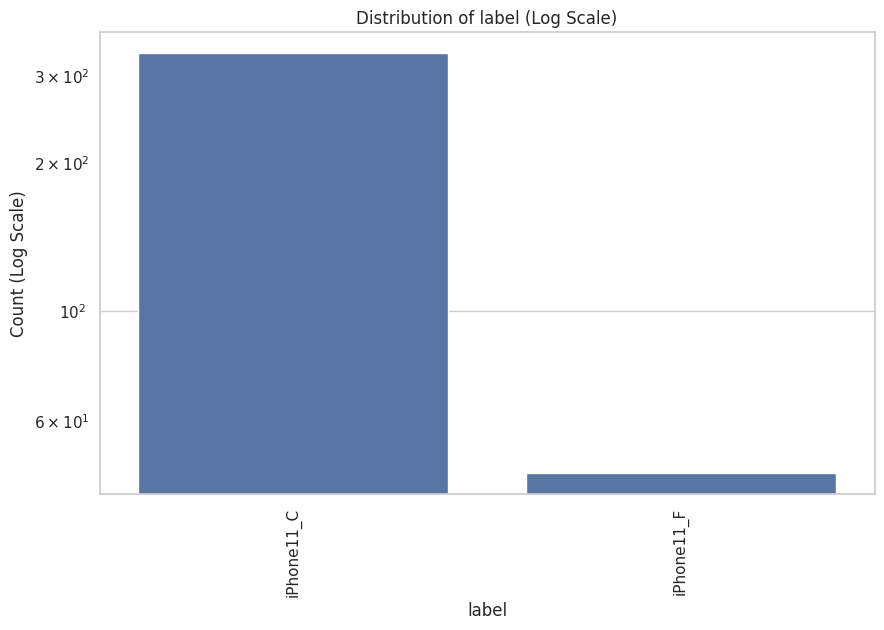

In [117]:
plotHelper.plot_label_distribution(df_grouped, "label", log_scale=True)

In [118]:
resampled_df = (
    df_grouped.groupby("label")
    .apply(lambda x: x.sample(n=10, replace=True, random_state=42))
    .reset_index(drop=True)
)

/tmp/ipykernel_16270/927111700.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=10, replace=True, random_state=42))


## Generate couples df

In [119]:
# df = df.head(4795)
df = resampled_df.copy()

In [120]:
import pandas as pd
from itertools import combinations

# Assuming df is your original DataFrame with an 'index' column and a 'label' column
# Replace these values with your actual DataFrame and column names
# df = your_original_dataframe
# index_column_name = 'index'
# label_column_name = 'label'

# Create all possible combinations of indexes (pairs)
index_pairs = list(combinations(df.index, 2))

# Create a list to store the results
results = []

# Iterate over the index pairs
for pair in index_pairs:
    index1, index2 = pair
    label1 = df.loc[index1, "label"]
    label2 = df.loc[index2, "label"]

    # Determine if the labels are equal or not and assign the corresponding value
    if label1 == label2:
        results.append((index1, index2, 1))  # Add +1 if labels are equal
    else:
        results.append((index1, index2, -1))  # Add -1 if labels are not equal

# Create a DataFrame from the results
pairs_df = pd.DataFrame(results, columns=["Item 1", "Item 2", "Equality"])

In [121]:
pairs_df

,Item 1,Item 2,Equality
0,0,1,1
1,0,2,1
2,0,3,1
3,0,4,1
4,0,5,1
...,...,...,...
185,16,18,1
186,16,19,1
187,17,18,1
188,17,19,1


In [122]:
pairs_df.to_csv("../../data/interim/identical-pairs_df.csv")

## Generate Bitmask Filters

In [123]:
df_no_mac = df.drop(columns=["mac", "label"])

In [124]:
df_no_mac

,len_ssid,len_sup_rates,supported_rates,len_ext_sup_rates,ext_sup_rates,dsss_parameter,len_ht_cap,ht_cap,len_ext_cap,ext_cap,len_vht_cap,vht_cap,len_vst,vst,len_ext_tags,ext_tags
0,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000110,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...
1,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000110,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...
2,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000101,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...
3,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000110,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...
4,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001011,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...
5,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00001000,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...
6,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000110,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...
7,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000110,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,0000000000000000000000000000000000000000000000...,00011100,0010001100000001000010000000100000011000000000...
8,00000000,00000100,1000001010000100100010111001011000000000000000...,00001000,0000110000010010000110000010010000110000010010...,00000011,00011010,0010110101000000000110111111111100000000000000...,00000000,01111111,0000000000000000000010000000010000000000000000...,0000000000000000000000000000000000000000000000...,00000000,000000000000000000000000000000000

In [125]:
# Create an empty list to store the bitmasks and their corresponding combinations
bitmask_combinations = []

# Iterate over all possible lengths of combinations
for r in range(1, len(df_no_mac.columns) + 1):
    # Generate all combinations of columns of length r
    column_combinations = combinations(df_no_mac.columns, r)
    # Iterate over each combination
    for cols in column_combinations:
        # Create the bitmask for each column combination
        bitmask = ""
        for column in df_no_mac.columns:
            if column in cols:
                bitmask += "1" * len(df_no_mac[column].iloc[0])
            else:
                bitmask += "0" * len(df_no_mac[column].iloc[0])
        # Append the bitmask and the column combination to the list
        bitmask_combinations.append((cols, bitmask))

# Create a DataFrame from the list of combinations
bitmask_combinations_df = pd.DataFrame(
    bitmask_combinations, columns=["Columns", "Bitmask"]
)

In [126]:
bitmask_combinations_df

,Columns,Bitmask
0,"(len_ssid,)",1111111100000000000000000000000000000000000000...
1,"(len_sup_rates,)",0000000011111111000000000000000000000000000000...
2,"(supported_rates,)",0000000000000000111111111111111111111111111111...
3,"(len_ext_sup_rates,)",0000000000000000000000000000000000000000000000...
4,"(ext_sup_rates,)",0000000000000000000000000000000000000000000000...
...,...,...
65530,"(len_ssid, len_sup_rates, supported_rates, ext...",1111111111111111111111111111111111111111111111...
65531,"(len_ssid, len_sup_rates, len_ext_sup_rates, e...",1111111111111111000000000000000000000000000000...
65532,"(len_ssid, supported_rates, len_ext_sup_rates,...",1111111100000000111111111111111111111111111111...
65533,"(len_sup_rates, supported_rates, len_ext_sup_r...",0000000011111111111111111111111111111111111111...


In [127]:
# bitmask_combinations_df.to_csv("../../data/filters/bitmasks.csv")

In [128]:
bitmask_combinations_df.iloc[150][1]

/tmp/ipykernel_16270/1118552787.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bitmask_combinations_df.iloc[150][1]


'111111110000000011111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [129]:
len(bitmask_combinations_df.iloc[150][1])

/tmp/ipykernel_16270/4032954012.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  len(bitmask_combinations_df.iloc[150][1])


2168

## Concatenate columns into one single string

In [130]:
# Concatenate all columns into a single string
string_df = df_no_mac.apply(lambda row: "".join(row), axis=1)

In [131]:
string_df

0     0000000000000100100000101000010010001011100101...
1     0000000000000100100000101000010010001011100101...
2     0000000000000100100000101000010010001011100101...
3     0000000000000100100000101000010010001011100101...
4     0000000000000100100000101000010010001011100101...
5     0000000000000100100000101000010010001011100101...
6     0000000000000100100000101000010010001011100101...
7     0000000000000100100000101000010010001011100101...
8     0000000000000100100000101000010010001011100101...
9     0000000000000100100000101000010010001011100101...
10    0000000000000100100000101000010010001011100101...
11    0000000000000100100000101000010010001011100101...
12    0000000000000100100000101000010010001011100101...
13    0000000000000100100000101000010010001011100101...
14    0000000000000100100000101000010010001011100101...
15    0000000000000100100000101000010010001011100101...
16    0000000000000100100000101000010010001011100101...
17    000000000000010010000010100001001000101110

In [132]:
string_df.to_csv("../../data/interim/identical-string_df.csv")